In [4]:
import pandas as pd
import sqlite3 as sql

In [5]:
database = "chinook.db"
connection = sql.connect(database)

In [6]:
pd.read_sql_query("select * from sqlite_master",connection)

,type,name,tbl_name,rootpage,sql
0,table,album,album,2,CREATE TABLE [album]\n(\n [album_id] INTEGE...
1,table,artist,artist,3,CREATE TABLE [artist]\n(\n [artist_id] INTE...
2,table,customer,customer,4,CREATE TABLE [customer]\n(\n [customer_id] ...
3,table,employee,employee,5,CREATE TABLE [employee]\n(\n [employee_id] ...
4,table,genre,genre,6,CREATE TABLE [genre]\n(\n [genre_id] INTEGE...
5,table,invoice,invoice,7,CREATE TABLE [invoice]\n(\n [invoice_id] IN...
6,table,invoice_line,invoice_line,8,CREATE TABLE [invoice_line]\n(\n [invoice_l...
7,table,media_type,media_type,9,CREATE TABLE [media_type]\n(\n [media_type_...
8,table,playlist,playlist,10,CREATE TABLE [playlist]\n(\n [playlist_id] ...
9,table,playlist_track,playlist_track,11,CREATE TABLE [playlist_track]\n(\n [playlis...


`The Chinook Music Store Database is essentially a digital library for a music store, containing information about artists, albums, songs, customers, and purchases. It's structured like a blueprint, neatly organizing all the data into eleven separate tables. Think of it as a simplified version of iTunes, providing a behind-the-scenes look at how a music store functions. For music enthusiasts and data enthusiasts alike, it offers valuable insights into the operations of a music store.`

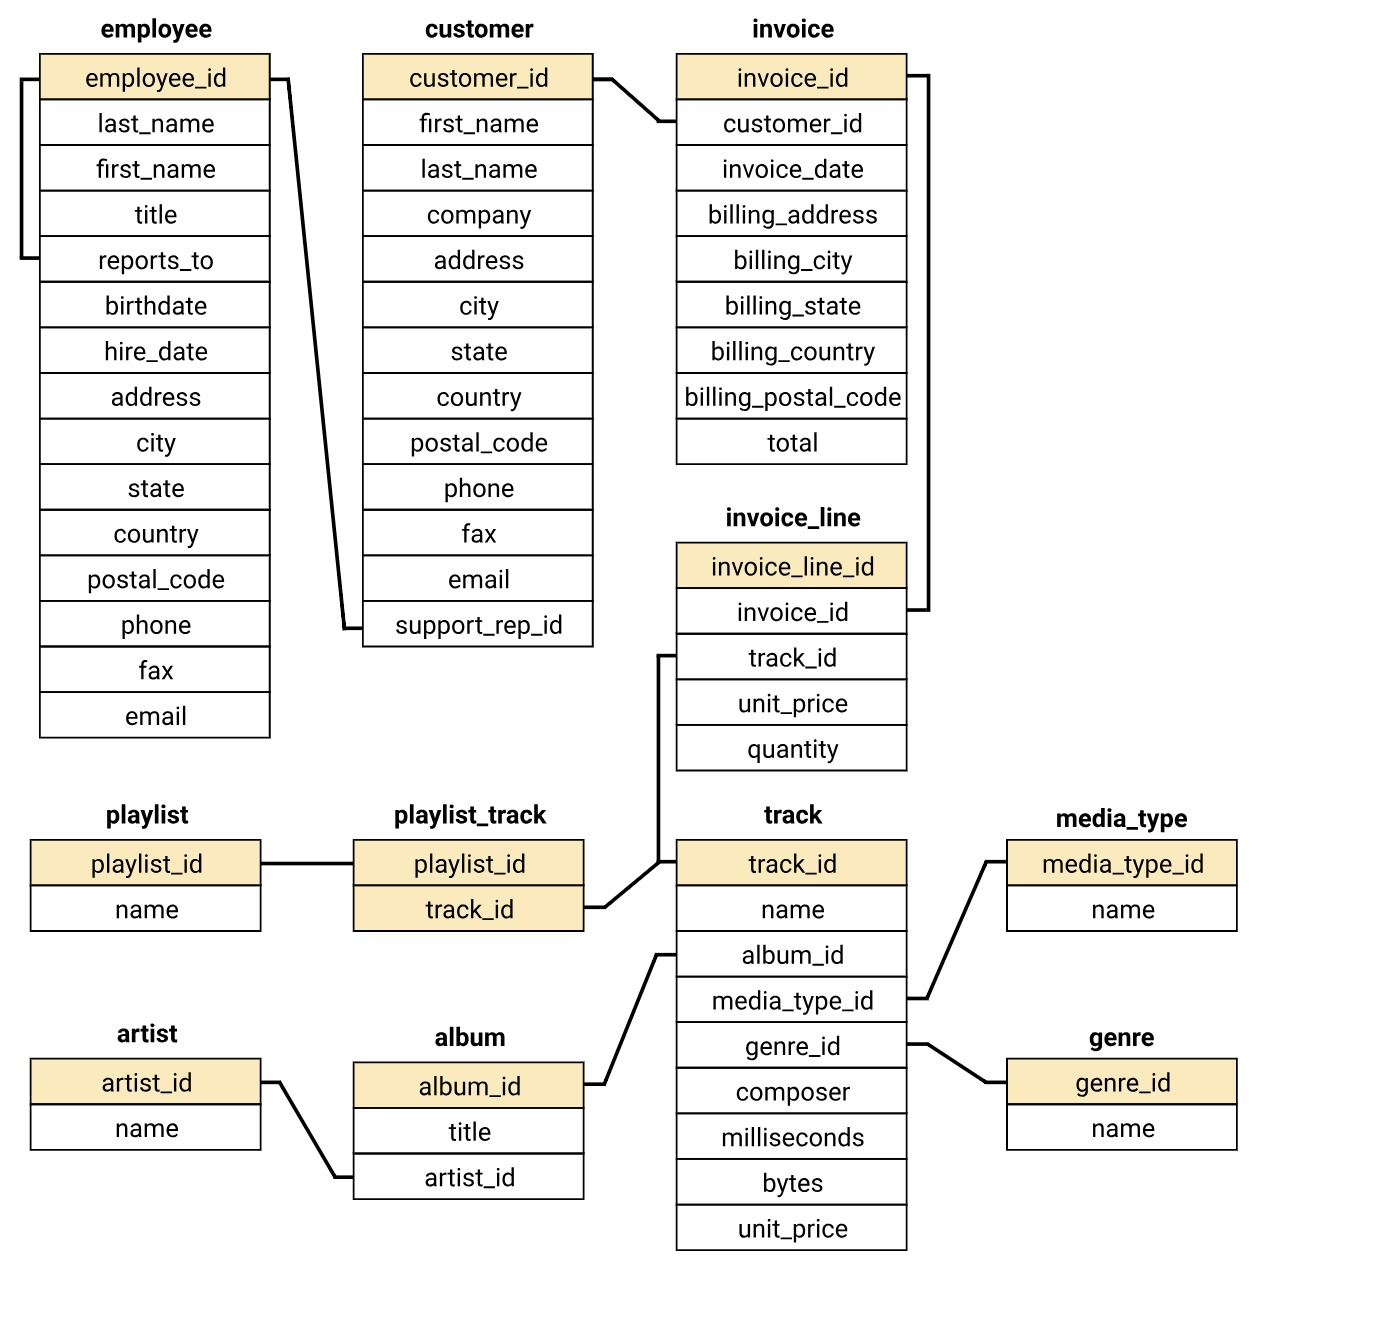

In [7]:
def read_query(q):
    return pd.read_sql_query(q,connection)

In [11]:
q = """ select c.first_name || " " || c.last_name Customer_name,
count(inv.invoice_id) no_of_visits,
sum(inv.total) Total_spend,
case
    when sum(inv.total) < 40 then "Small Spender"
    when sum(inv.total) > 100 then "Big Spender"
    Else "Regular"
end Customer_category
from customer c
left join invoice inv
on
c.customer_id = inv.customer_id
group  by c.customer_id
"""
read_query(q)

,Customer_name,no_of_visits,Total_spend,Customer_category
0,Luís Gonçalves,13,108.90,Big Spender
1,Leonie Köhler,11,82.17,Regular
2,François Tremblay,9,99.99,Regular
3,Bjørn Hansen,9,72.27,Regular
4,František Wichterlová,18,144.54,Big Spender
5,Helena Holý,12,128.70,Big Spender
6,Astrid Gruber,9,69.30,Regular
7,Daan Peeters,7,60.39,Regular
8,Kara Nielsen,10,37.62,Small Spender
9,Eduardo Martins,12,60.39,Regular


In [12]:
import pandas as pd
import sqlite3 as sql
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Scenario
Chinook Record Store is looking to expand its collection by adding three albums from a selection of four new artists, each representing a different music genre: Hip-Hop, Punk, Pop, and Blues. Since the store primarily focuses on US artists and intends to promote its albums in the USA, it wants to make informed decisions based on which genres are most popular in the country. To do this, they'll analyze their sales data to identify which genres sell the most tracks in the USA. By understanding these trends, Chinook can recommend the purchase of albums from the three artists whose genres are most popular among US customers.

In [13]:
q = """
WITH usa_tracks AS
 (
 SELECT t.genre_id, il.invoice_line_id, i.billing_country FROM track AS t
 INNER JOIN invoice_line AS il ON il.track_id = t.track_id
 INNER JOIN invoice AS i ON i.invoice_id = il.invoice_id
 WHERE i.billing_country = "USA"
 )

SELECT g.name AS genre_name,
 COUNT(usa.genre_id) AS num_purchases,
 ROUND((CAST(COUNT(usa.genre_id) AS FLOAT) / (SELECT COUNT(genre_id)
 FROM usa_tracks)) *100,2) AS percentage_sold

FROM usa_tracks AS usa
INNER JOIN genre AS g ON g.genre_id = usa.genre_id
GROUP BY g.name
ORDER BY num_purchases DESC"""
df = read_query(q)
df

,genre_name,num_purchases,percentage_sold
0,Rock,561,53.38
1,Alternative & Punk,130,12.37
2,Metal,124,11.80
3,R&B/Soul,53,5.04
4,Blues,36,3.43
5,Alternative,35,3.33
6,Pop,22,2.09
7,Latin,22,2.09
8,Hip Hop/Rap,20,1.90
9,Jazz,14,1.33


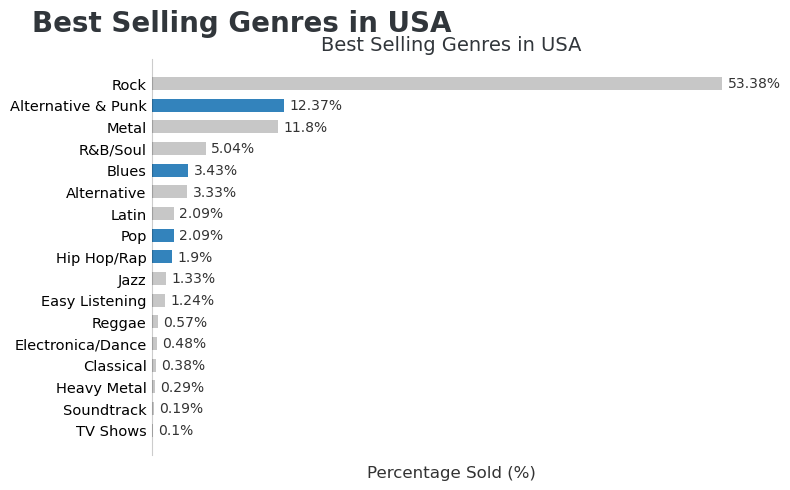

In [16]:
# Sorting the DataFrame by percentage sold
df = df.sort_values(by="percentage_sold")
# Creating a color map to identify key albums of interest
album_options = ['Hip Hop/Rap', 'Alternative & Punk', 'Blues', 'Pop']
cmap = df['genre_name'].apply(lambda x: "#0064AB" if x in album_options else '#BABABA')
# Creating the bar plot
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.barh(df['genre_name'], df['percentage_sold'], height=0.6, color=cmap, alpha=0.8)
# Adding text and adjusting width of bars
for bar, percentage in zip(bars, df['percentage_sold']):
 ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, f'{percentage}%', va='center', ha='left',fontsize=10, color='#333333')
# Customizing axes and layout
ax.set_yticks(range(len(df['genre_name']))) # setting the tick positions
ax.set_yticklabels(df['genre_name'], fontsize=10.5)
ax.set_xticks([])
plt.text(-0.2, 1.07, "Best Selling Genres in USA", fontsize=20, fontweight='bold', color='#31363b',transform=ax.transAxes)
plt.xlabel("Percentage Sold (%)", fontsize=12, color='#333333')
plt.title("Best Selling Genres in USA", fontsize=14, color='#31363b')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# Adjusting left spine opacity
ax.spines['left'].set_color('#000000')
ax.spines['left'].set_alpha(0.2)
# Removing y_ticks parameters
ax.tick_params(axis='y', which='both', length=0)
plt.tight_layout()
plt.show()

Based on the analysis of track purchases in the USA, the top-selling genres are as follows:

- Rock: It accounts for the highest percentage of purchases at 53.38%, with a total of 561 purchases.
- Alternative & Punk: This genre follows with 12.37% of purchases, totaling 130.
- Metal: Metal music represents 11.80% of purchases, with 124 tracks sold.
- R&B/Soul: R&B/Soul occupies 5.04% of purchases, amounting to 53 tracks sold.
- Blues: Blues music constitutes 3.43% of purchases, with 36 tracks sold.
- Alternative: This genre accounts for 3.33% of purchases, totaling 35 tracks.
- Pop: Pop music holds 2.09% of purchases, with 22 tracks sold.
- Latin: Latin music also represents 2.09% of purchases, with 22 tracks sold.
- Hip Hop/Rap: Hip Hop/Rap makes up 1.90% of purchases, with 20 tracks sold.
The remaining genres each have less than 2% of total purchases, with Jazz, Easy Listening, and Reggae having relatively low sales. Based on these findings, Chinook Record Store may consider selecting albums from artists in the Rock, Alternative & - Punk, and Metal genres, as they appear to be the most popular among US customers.

## SCENARIO

Chinook assigns each customer to a sales support agent after their initial purchase. Now, Chinook wants to evaluate the performance of their sales agents to see if there are any differences in their effectiveness. To do this, they need information on each sales executive, including their names and hire dates, as well as details on the number of customer accounts they manage and the total purchases made by those accounts. Additionally, Chinook wants to calculate the average sales for each account managed by the sales executives. This analysis will help Chinook identify which sales agents are performing well and which ones may need additional support or training.

In [17]:
q = """
 WITH t1 AS (SELECT em.first_name || ' ' || em.last_name AS sales_rep_name,
 em.hire_date,
 COUNT(cu.customer_id) AS num_invoices,
 CAST(SUM(inv.total) AS Integer) AS total_sales
 FROM employee em
 JOIN customer cu
 ON em.employee_id = cu.support_rep_id
 JOIN invoice inv
 ON inv.customer_id = cu.customer_id
 GROUP BY 1
 ORDER BY 4 DESC)

 SELECT *,
 ROUND(CAST(total_sales AS float) / num_invoices, 2)
 AS sales_per_customer

 FROM t1
 """
df =read_query(q)
df


,sales_rep_name,hire_date,num_invoices,total_sales,sales_per_customer
0,Jane Peacock,2017-04-01 00:00:00,212,1731,8.17
1,Margaret Park,2017-05-03 00:00:00,214,1584,7.40
2,Steve Johnson,2017-10-17 00:00:00,188,1393,7.41


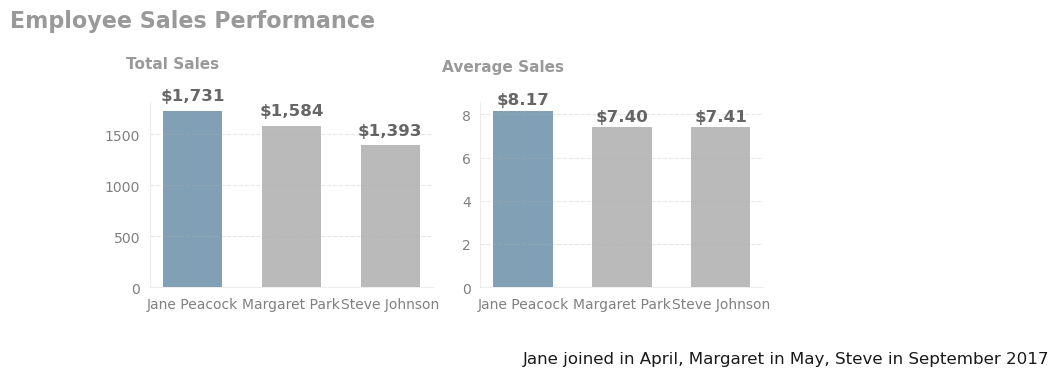

In [19]:
# Sorting the DataFrame by percentage sold
sales_rep_name = df['sales_rep_name'].values
total_sales = df['total_sales'].values
sales_per_customer = df['sales_per_customer'].values
# Creating the bar plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,8))
# Total sales chart
axes[0].bar(sales_rep_name, total_sales, color="#BABABA", width=0.6)
axes[0].bar(sales_rep_name[0], total_sales[0], color="#0064AB", alpha=0.3, width=0.6)
# Total sales chart label
axes[0].text(x=-0.2, y=2150, s='Total Sales', size=11, fontweight='bold', alpha=0.4, ha='center')
# Total sales annotations
for sales, index in zip(total_sales, range(3)):
 axes[0].text(x=index, y=sales+100, s='${:,}'.format(sales), ha='center', fontweight='bold', alpha=0.6, size=12)
# Chart title
axes[0].text(x=0, y=2550, s='Employee Sales Performance', size=16, fontweight='bold', alpha=0.4, ha='center')
# Average sales chart
axes[1].bar(sales_rep_name, sales_per_customer, color="#BABABA", width=0.6)
axes[1].bar(sales_rep_name[0], sales_per_customer[0], color="#0064AB", alpha=0.3, width=0.6)
# Average sales chart lable
axes[1].text(x=-0.2, y=10, s='Average Sales', size=11, fontweight='bold', alpha=0.4, ha='center')
# Average sales annotations
for sales, index in zip(sales_per_customer, range(3)):
 axes[1].text(x=index, y=sales+0.3, s='${:,.2f}'.format(sales), ha='center', fontweight='bold', alpha=0.6, size=12)
# Footnote
axes[1].text(x=0, y=-3.5, s='Jane joined in April, Margaret in May, Steve in September 2017', alpha=0.9, size=12)
# Common attributes to both charts
for ax in axes:
 ax.spines['top'].set_visible(False)
 ax.spines['right'].set_visible(False)
 ax.spines['left'].set_color('#DDD')
 ax.spines['left'].set_alpha(0.5)
 ax.spines['bottom'].set_color("#DDD")
 ax.spines['bottom'].set_alpha(0.5)

 ax.tick_params(left=False, bottom=False, labelsize=10, labelcolor='grey')
 ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Result

Among the three sales employees at Chinook, Jane has achieved the highest total sales, amounting to $1,731. Margaret Park follows in second place, while Steve ranks last with $1,393 in sales. The difference in sales is expected, as Jane and Margaret were hired about five months before Steve, giving them more time to build relationships with customers and generate sales.

Jane's performance is further supported by her average sales per customer, which stands at $8.17, the highest among the three employees. Despite the difference in employment dates, Steve also performs slightly better than Margaret in terms of average sales per customer. Overall, these findings highlight Jane's effectiveness as a sales agent, with Steve also showing promising results despite joining the team later than the others.

## SCENARIO

Chinook is interested in gaining insights into sales distribution across various countries to identify potential areas for growth. They aim to understand which countries contribute the most to their sales and which ones show potential for expansion. To achieve this, Chinook plans to analyze purchase data from different countries. For each country, they want to gather information such as the total number of customers, total sales revenue, average sales per customer, and average order value. Additionally, if a country has only one customer, they will group it under "Other" for better analysis. This analysis will help Chinook make informed decisions about where to focus their marketing efforts and potentially run advertising campaigns to capitalize on growth opportunities in specific countries.


In [23]:
q = """
-- Collate the number of customers in each country
WITH t1 AS (
 SELECT country, COUNT(customer_id) AS num_customers
 FROM customer
 GROUP BY country
),
-- Collate the total sales in each country
t2 AS (
 SELECT cu.country,
 ROUND(SUM(iv.total), 2) AS total_sales,
 COUNT(iv.invoice_Id) AS num_sales
 FROM customer cu
 JOIN invoice iv ON cu.customer_id = iv.customer_id
 GROUP BY 1
),
-- Group countries with only one customer as "Others"
t3 AS (
 SELECT CASE WHEN t1.num_customers = 1 THEN 'Others'
 ELSE t1.country END AS countries,
 SUM(t1.num_customers) AS num_customers, -- Corrected alias here
 SUM(t2.total_sales) AS total_sales,
 SUM(t2.num_sales) AS num_sales
 FROM t1
 JOIN t2 ON t1.country = t2.country
 GROUP BY 1
)
-- Calculate relevant sales metrics
SELECT countries,
 num_customers,
 total_sales,
 ROUND(total_sales / num_sales, 2) AS avg_order_value,
 ROUND(total_sales / num_customers, 2) AS sales_per_customer
FROM (
 SELECT *,
 CASE WHEN countries = 'Others' THEN 1
 ELSE 0 END AS sort
 FROM t3
)
ORDER BY sort, num_customers DESC;
"""
df = read_query(q)
df

,countries,num_customers,total_sales,avg_order_value,sales_per_customer
0,USA,13,1040.49,7.94,80.04
1,Canada,8,535.59,7.05,66.95
2,Brazil,5,427.68,7.01,85.54
3,France,5,389.07,7.78,77.81
4,Germany,4,334.62,8.16,83.66
5,United Kingdom,3,245.52,8.77,81.84
6,Czech Republic,2,273.24,9.11,136.62
7,India,2,183.15,8.72,91.58
8,Portugal,2,185.13,6.38,92.57
9,Others,15,1094.94,7.45,73.00


In [26]:
avg_cust_purchase = df.sales_per_customer.mean()
df['pcent_customer'] = round(100*df.num_customers / df.num_customers.sum(), 1)
df['pcent_sales'] = round(100*df.total_sales / df.total_sales.sum(), 1)
df['cust_purchase_diff'] = round(100 * (df.sales_per_customer - avg_cust_purchase) / avg_cust_purchase, 2)


,countries,num_customers,total_sales,avg_order_value,sales_per_customer,pcent_customer,pcent_sales,cust_purchase_diff
0,USA,13,1040.49,7.94,80.04,22.0,22.1,-7.96
1,Canada,8,535.59,7.05,66.95,13.6,11.4,-23.01
2,Brazil,5,427.68,7.01,85.54,8.5,9.1,-1.63
3,France,5,389.07,7.78,77.81,8.5,8.3,-10.52
4,Germany,4,334.62,8.16,83.66,6.8,7.1,-3.80
5,United Kingdom,3,245.52,8.77,81.84,5.1,5.2,-5.89
6,Czech Republic,2,273.24,9.11,136.62,3.4,5.8,57.10
7,India,2,183.15,8.72,91.58,3.4,3.9,5.31
8,Portugal,2,185.13,6.38,92.57,3.4,3.9,6.45
9,Others,15,1094.94,7.45,73.00,25.4,23.2,-16.05


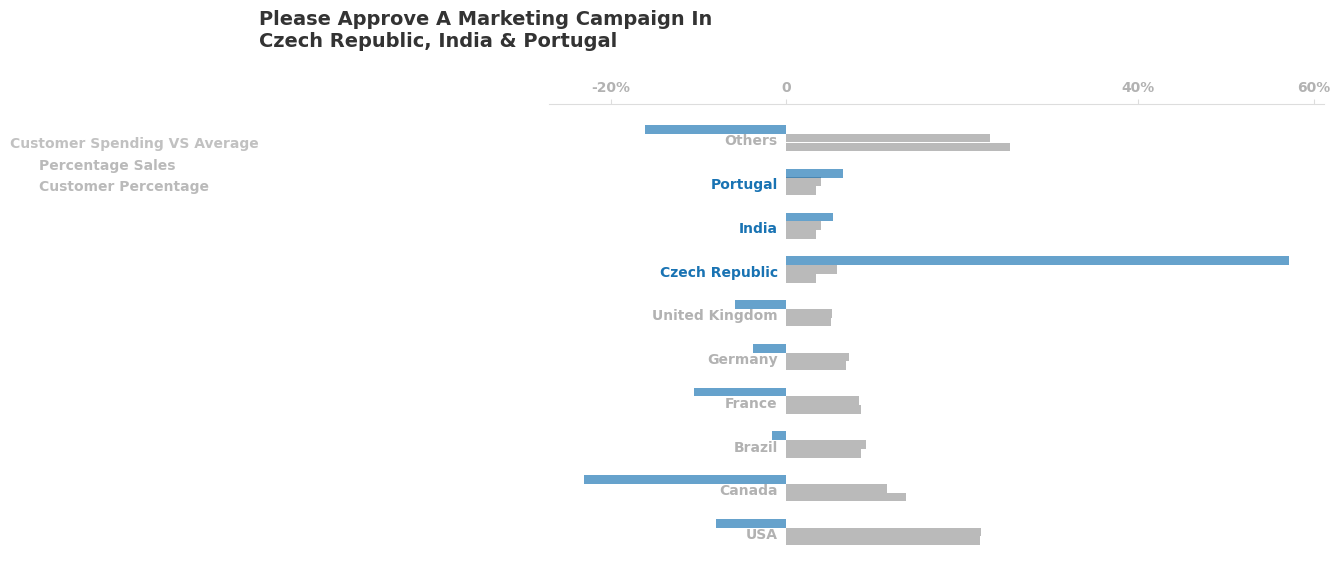

In [30]:
# Visualization
y_labs = df.countries.values
y_axes = np.arange(df.countries.size)
fig = plt.figure(figsize=(10,6))
plt.barh(y_axes-0.3, df.pcent_customer, height=0.2, color='#BABABA')
plt.barh(y_axes-0.1, df.pcent_sales, height=0.2, color='#BABABA')
plt.barh(y_axes+0.1, df.cust_purchase_diff, height=0.2, color='#0064AB', alpha=0.6)
color_map = ["", "", "", "", "", "", "Yes", "Yes", "Yes", ""]
# Annotate y axis ticks
for loc, label, color in zip(y_axes, y_labs, color_map):
 if color == "Yes":
     plt.text(x=-1, y=loc-0.25, s=label, ha='right', color='#0064AB', alpha=0.9, size=10, fontweight='bold')
 else:
     plt.text(x=-1, y=loc-0.25, s=label, ha='right', alpha=0.3, size=10, fontweight='bold')
# Set plot legend
plt.text(x=-60, y=8.7, s="Customer Spending VS Average", ha='right', alpha=0.3, size=10, fontweight='bold', color='#333333')
plt.text(x=-85, y=8.2, s="Percentage Sales", color="#BABABA", size=10, fontweight='bold')
plt.text(x=-85, y=7.7, s="Customer Percentage", color="#BABABA", size=10, fontweight='bold')
# Set plot title
plt.text(x=-60, y=11, s="Please Approve A Marketing Campaign In\nCzech Republic, India & Portugal", size=14, fontweight='bold', color='#333333')
for ax in fig.get_axes():
 plt.sca(ax)
 sns.despine(left=True, bottom=True, top=False)
 ax.tick_params(left=False, bottom=False, color='#ddd')
 ax.xaxis.set_ticks_position('top')
 ax.spines['top'].set_color('#DDD')
 plt.yticks([])
 plt.xticks([-20, 0, 40, 60], ['-20%', '0', '40%', '60%'], size=10, alpha=0.3, fontweight='bold')
plt.show()

### Result
The analysis of Chinook's sales data reveals that the majority of their sales come from the United States and Canada, which also have the largest customer bases. However, despite the high sales volume, customers in these countries tend to spend less per invoice compared to other countries.

On the other hand, although the Czech Republic, Portugal, and India have fewer customers and lower sales values overall, customers in these countries tend to spend more per invoice. This suggests that there is potential for increased revenue from these markets.

To capitalize on this potential, Chinook could consider running marketing campaigns targeted specifically at these three countries to expand their customer base. However, since the data from these countries are relatively limited compared to the US and Canada, Chinook should start with small-scale marketing campaigns. These campaigns would aim to gather more data and insights, allowing Chinook to refine their strategies for each market effectively.

In [32]:
q = """
WITH all_and_purchased AS
(
 SELECT t.track_id all_tracks, il.track_id AS purchased_tracks
 FROM track AS t
 LEFT JOIN invoice_line il ON il.track_id=t.track_id
)
SELECT COUNT(DISTINCT a.all_tracks) total_tracks,
 COUNT(DISTINCT a.purchased_tracks) tracks_purchased,
 COUNT(DISTINCT a.all_tracks) - COUNT(DISTINCT a.purchased_tracks) not_purchased,
 ROUND(COUNT(DISTINCT a.purchased_tracks) / CAST(COUNT(DISTINCT a.all_tracks) AS float), 2) percent_purchased
FROM all_and_purchased AS a;
"""
df2 = read_query(q)
df2

,total_tracks,tracks_purchased,not_purchased,percent_purchased
0,3503,1806,1697,0.52


In [33]:
purchased = df2.T
purchased = purchased.iloc[[1,2], 0]
purchased_list = purchased.tolist()


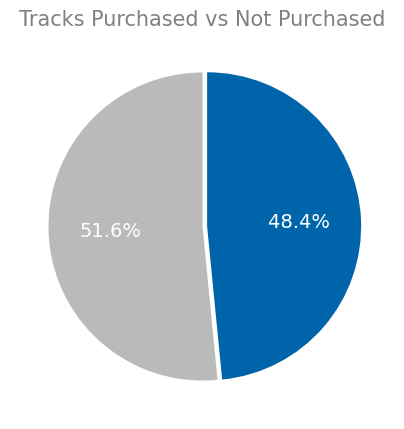

In [34]:
# Plot
plt.pie(purchased_list,
 explode=(0, 0.03),
 startangle=90,
 autopct='%1.1f%%',
 textprops={'fontsize' : 14 , 'color': 'white'},
 colors=("#BABABA" , "#0064AB")
 )
# Plot Aesthetics
plt.title('Tracks Purchased vs Not Purchased', fontsize=15, color='grey')
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.show()


### Result
Almost half of the track inventory at Chinook has not sold.

In [36]:
q = """
SELECT ar.name artist_name, g.name genre, COUNT(il.track_id) units_sold
 FROM track t
 LEFT JOIN invoice_line il ON il.track_id = t.track_id
 INNER JOIN album al ON al.album_id = t.album_id
 INNER JOIN artist ar ON ar.artist_id = al.artist_id
 INNER JOIN genre g ON g.genre_id = t.genre_id
 GROUP BY artist_name
 HAVING units_sold = 0
 ORDER BY units_sold;
"""
read_query(q)


,artist_name,genre,units_sold
0,Aaron Copland & London Symphony Orchestra,Classical,0
1,Academy of St. Martin in the Fields Chamber En...,Classical,0
2,"Academy of St. Martin in the Fields, John Birc...",Classical,0
3,"Academy of St. Martin in the Fields, Sir Nevil...",Classical,0
4,Adrian Leaper & Doreen de Feis,Classical,0
...,...,...,...
69,The Office,TV Shows,0
70,The Tea Party,Alternative & Punk,0
71,Ton Koopman,Classical,0
72,Toquinho & Vinícius,Bossa Nova,0



Among Chinook's inventory, 74 artists have not sold any units, with a significant portion of these tracks falling under the classical music genre. This indicates a potential gap in customer interest or marketing efforts for classical music.

Currently, half of Chinook's inventory remains unsold, tying up working capital without generating returns. The approach Chinook takes regarding these unsold tracks depends on their payment arrangement with record labels.

If Chinook pays a fixed fee to host these tracks, it may be prudent to focus on more popular genres and consider discontinuing partnerships with less successful artists. However, if Chinook pays the record label based on a sales percentage, there is less risk in keeping these tracks in the store.

Regardless of the payment arrangement, Chinook should explore strategies to promote these low-selling artists. This could involve integrating suggestions for these artists into the purchasing process or prominently displaying them on the website's cart page to increase their exposure and potentially drive sales. By implementing such measures, Chinook can maximize the potential of their entire inventory while providing support to artists who may need it.

## SCENARIO

At the Chinook store, customers have the option to purchase music in two ways: they can either buy a complete album or select individual tracks. However, there's a restriction in the system that doesn't allow customers to buy a full album and then add individual tracks to the same purchase unless they manually select each track.

When customers opt to purchase albums, they are charged the same total price as if they had bought each track separately. This means that buying an album doesn't provide any discount compared to purchasing individual tracks.

Currently, Chinook's management is considering a new approach to purchasing music to reduce costs. Instead of buying every track from an album, they are thinking about purchasing only the most popular tracks from each album directly from the record companies. This new strategy aims to optimize their spending by focusing on the tracks that generate the most revenue or are in high demand, rather than acquiring entire albums with potentially less popular tracks.


In [40]:
q = """
WITH invoice_data AS
(
 SELECT invoice_id, MIN(track_id) track_id
 FROM invoice_line
 GROUP BY 1
),
Album_purchased AS
(
 SELECT invoice_id,
 Case
 when
 (
 SELECt t2.track_id
 FROM track t1
 JOIN track t2
 ON
 t1.album_id = t2.album_id
 WHERE t1.track_id = invd.track_id

 Except

 SELECT il.track_id
 FROM invoice_line il
 WHERE il.invoice_id = invd.invoice_id
 ) IS NULL

 AND

 (
 SELECT il.track_id
 FROM invoice_line il
 WHERE il.invoice_id = invd.invoice_id

 Except

 SELECT t2.track_id
 FROM track t1
 JOIN track t2
 ON
 t1.album_id = t2.album_id
 WHERE t1.track_id = invd.track_id
 ) IS NULL

 Then 'Yes'
 ELSE 'No'
 END AS Purchased_album
 FROM invoice_data invd
)
SELECT Purchased_album,
 COUNT(invoice_id) AS no_of_invoices,
 CAST(COUNT(invoice_id) AS FLOAT) * 100 /
 (SELECT COUNT(*) FROM Album_purchased) AS percent
FROM Album_purchased
GROUP BY 1
"""
read_query(q)

,Purchased_album,no_of_invoices,percent
0,No,500,81.433225
1,Yes,114,18.566775


### Result

The majority of purchases made at the Chinook store, accounting for 81%, are for individual tracks rather than entire albums. However, in approximately 19% of cases, customers choose to buy complete albums instead.

Chinook needs to consider this distribution carefully when contemplating a strategy to purchase only the most popular tracks from albums. While focusing solely on popular tracks might seem like a cost-saving measure, there's a risk of losing revenue from customers who prefer to purchase entire albums. These customers might be attracted to the completeness and cohesion of albums, and purchasing only select tracks could potentially deter them from making purchases. Therefore, Chinook should weigh the potential cost savings against the potential loss of revenue from album purchases before implementing such a strategy.

## CONCLUSION

Throughout this project, we've delved into various aspects of a fictional company's operations to provide insights and recommendations aimed at boosting profitability.

For selecting new albums, our analysis suggests that Chinook should prioritize genres popular in the USA. Albums from Hip-Hop, Punk, and Pop genres show promising sales potential, with Rock also holding significant sales. This indicates an opportunity to further capitalize on the popularity of Rock music.

In terms of employee performance, Jane emerges as the top performer among sales representatives. While Steve may have lower total sales, it's worth noting that he joined the team later, potentially requiring additional support and training to reach his full potential.

Analyzing sales by country reveals that while the USA and Canada boast the largest customer bases, customers there tend to spend less per transaction. Conversely, the Czech Republic, India, and Portugal show higher average spending per customer, indicating potential markets for targeted marketing campaigns to attract more customers and drive sales.

Regarding Chinook's track purchasing strategy, focusing solely on popular tracks may seem appealing but risks alienating customers who prefer to purchase entire albums. Gathering customer feedback through surveys would provide valuable insights into their preferences before implementing any changes.

In conclusion, by heeding these recommendations and staying attuned to customer needs and market trends, Chinook can optimize its operations, enhance customer satisfaction, and ultimately drive sustainable growth and profitability.